In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/disease-prediction-using-machine-learning/Training.csv
/kaggle/input/disease-prediction-using-machine-learning/Testing.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
data_training = pd.read_csv('/kaggle/input/disease-prediction-using-machine-learning/Training.csv').dropna(axis=1)
data_training.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [4]:
data_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [5]:
data_training.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [6]:
disease_counts = data_training['prognosis'].value_counts()
temp_df = pd.DataFrame({
    "Disease":disease_counts.index,
    "Counts":disease_counts.values
})

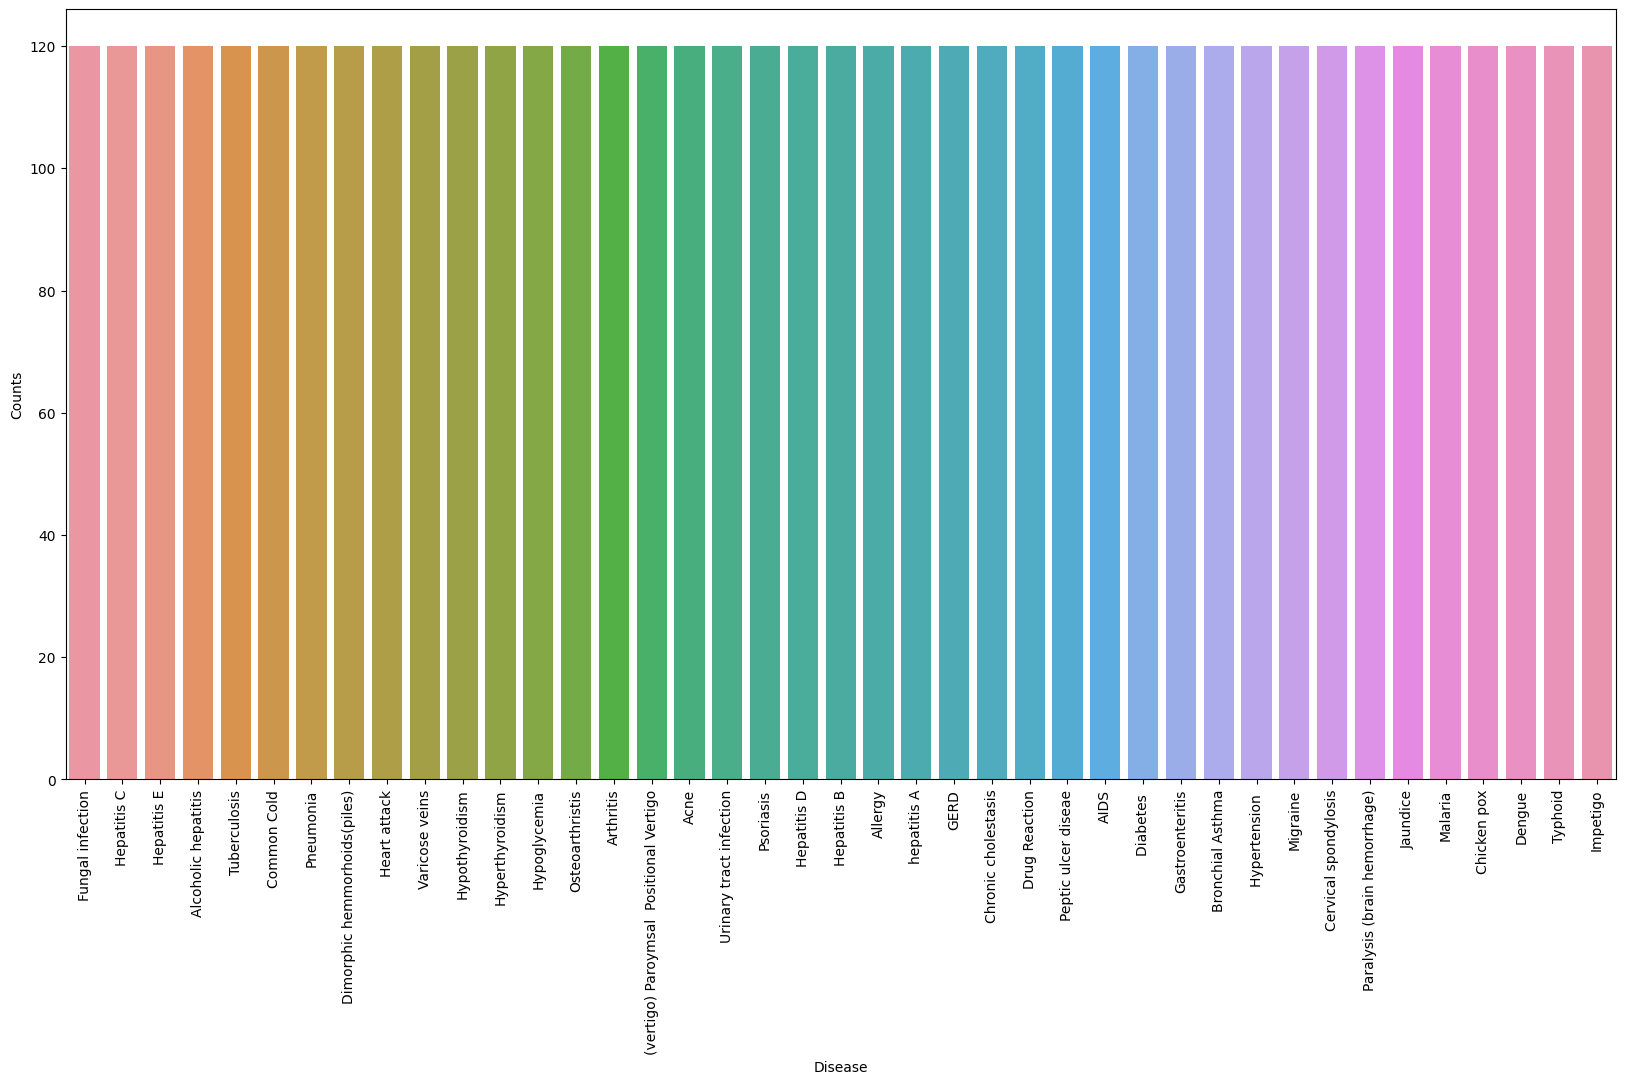

In [7]:
plt.figure(figsize=(20,10))
sns.barplot(x="Disease", y="Counts", data=temp_df)
plt.xticks(rotation=90)
plt.show()

In [8]:
encoder = LabelEncoder()
data_training['prognosis'] = encoder.fit_transform(data_training["prognosis"])

In [9]:
x = data_training.iloc[:,:-1]
y = data_training.iloc[:,-1]
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=24)

print(f'Train: {xtrain.shape}, {ytrain.shape}')
print(f'Test: {xtest.shape}, {ytest.shape}')

Train: (3936, 132), (3936,)
Test: (984, 132), (984,)


In [10]:
def cv_scoring(estimator, x,y):
    return accuracy_score(y, estimator.predict(x))

models = {
    "SVC":SVC(),
    "Gaussian NB":GaussianNB(),
    "Random Forest":RandomForestClassifier(random_state = 18)
}

for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, x,y,cv=10, n_jobs=-1, scoring=cv_scoring)
    print("=="*30)
    print(model_name)
    print(f"Score: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

SVC
Score: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Gaussian NB
Score: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Random Forest
Score: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


accuracy (train) of SVM classifier:1.0
Acuuracy (test) of svm classifier:1.0


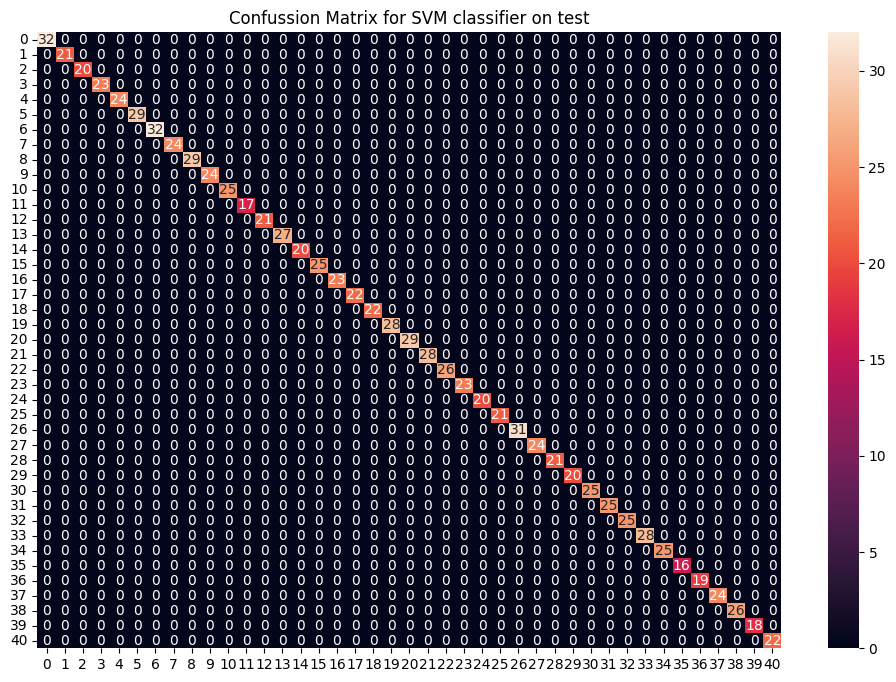

In [11]:
svm_model = SVC()
svm_model.fit(xtrain, ytrain)
preds = svm_model.predict(xtest)

print(f"accuracy (train) of SVM classifier:{accuracy_score(ytrain, svm_model.predict(xtrain))}")
print(f"Acuuracy (test) of svm classifier:{accuracy_score(ytest, preds)}")
cf_matrix = confusion_matrix(ytest, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confussion Matrix for SVM classifier on test")
plt.show()

accuracy (train) of NB classifier:1.0
Acuuracy (test) of NB classifier:1.0


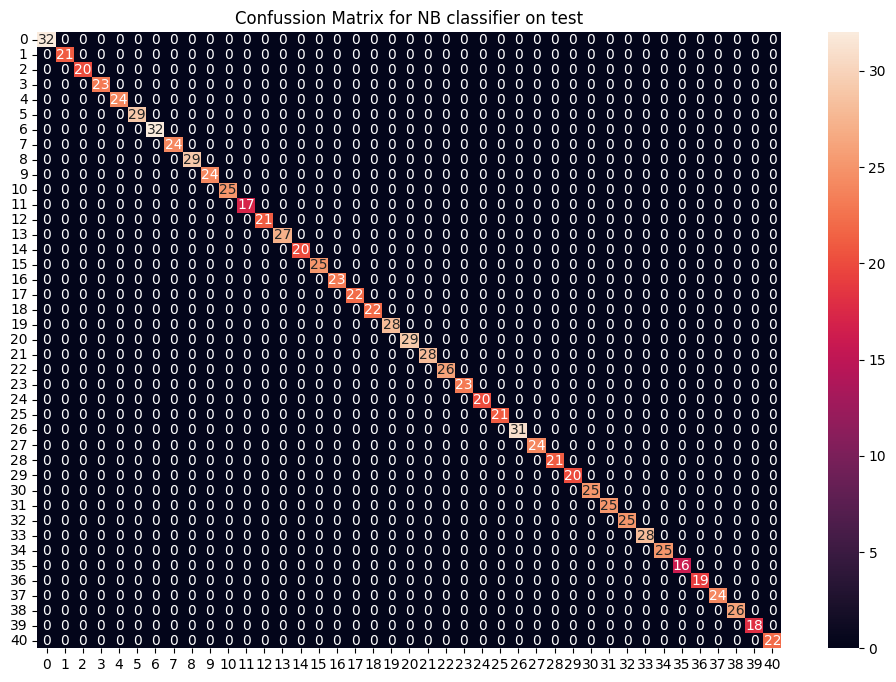

In [12]:
nb_model = GaussianNB()
nb_model.fit(xtrain, ytrain)
preds = nb_model.predict(xtest)

print(f"accuracy (train) of NB classifier:{accuracy_score(ytrain, nb_model.predict(xtrain))}")
print(f"Acuuracy (test) of NB classifier:{accuracy_score(ytest, preds)}")
cf_matrix = confusion_matrix(ytest, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confussion Matrix for NB classifier on test")
plt.show()

accuracy (train) of RF classifier:1.0
Acuuracy (test) of RF classifier:1.0


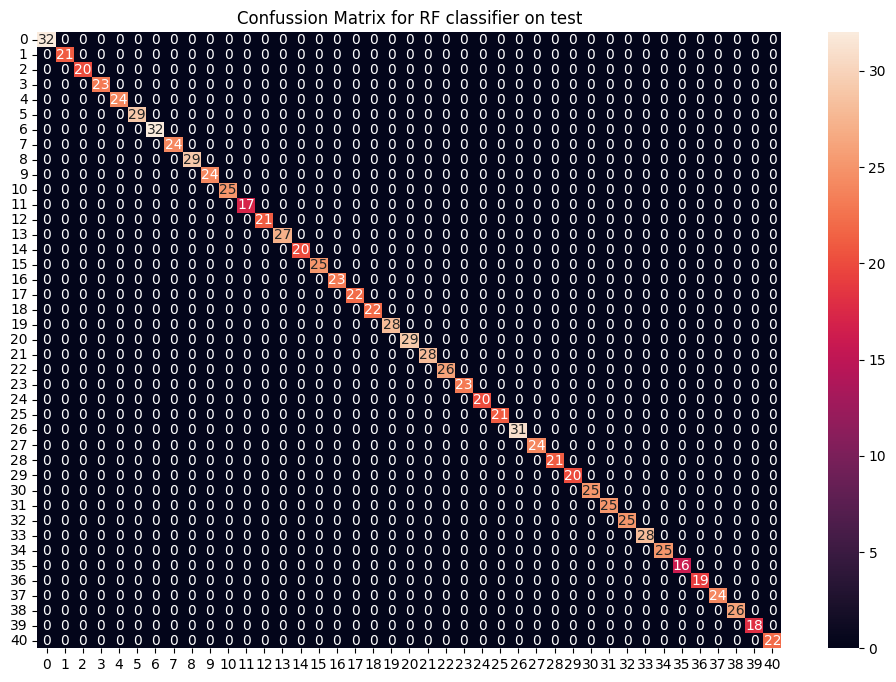

In [13]:
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(xtrain, ytrain)
preds = rf_model.predict(xtest)

print(f"accuracy (train) of RF classifier:{accuracy_score(ytrain, rf_model.predict(xtrain))}")
print(f"Acuuracy (test) of RF classifier:{accuracy_score(ytest, preds)}")
cf_matrix = confusion_matrix(ytest, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confussion Matrix for RF classifier on test")
plt.show()

In [14]:
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)
final_svm_model.fit(x,y)
final_nb_model.fit(x,y)
final_rf_model.fit(x,y)

RandomForestClassifier(random_state=18)

In [15]:
data_test = pd.read_csv('/kaggle/input/disease-prediction-using-machine-learning/Testing.csv').dropna(axis=1)

In [16]:
testx = data_test.iloc[:,:-1]
testy = encoder.transform(data_test.iloc[:, -1])

In [17]:
svm_pred = final_svm_model.predict(testx)
nb_pred = final_nb_model.predict(testx)
rf_pred = final_rf_model.predict(testx)

In [18]:
print(svm_pred)

[15  4 16  9 14 33  1 12 17  6 23 30  7 32 28 29  8 11 37 40 19 20 21 22
  3 36 10 34 13 18 39 26 24 25 31  5  0  2 38 35 27 15]
